In [89]:
# Dependenacies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [90]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [91]:
import numpy as np
import pandas as pd

In [92]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [93]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [94]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [95]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [96]:
 inspector = inspect(engine)
table_list=inspector.get_table_names()
table_list

['measurement', 'station']

In [97]:
print("--------------------------")
for table in table_list:
    columns = inspector.get_columns(table)
    print(f'Table name:     {table}\n')
    for c in columns:
        print(c['name'],c["type"])
    print("--------------------------")

--------------------------
Table name:     measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------------
Table name:     station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
--------------------------


In [98]:
# Map Station class
STAT = Base.classes.station

# Map Measurement class
MEASUR = Base.classes.measurement

In [99]:
session = Session(bind=engine)

# DATA Explortion
## Goal

***1) Get a general sense of what the data looks like***

***2) Identifuy data problems (i.i. nan)***

***3) Clean up data. If neccessary***

***4) Get a sense of metrics to benchmark work***

In [240]:
# Exploring data set 
session.query(STAT.station, STAT.name, STAT.elevation).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 152.4)]

In [117]:
# Exploring dates 
# Finding last date
last_day = session.query(MEASUR.date).order_by(MEASUR.date.desc()).first()
last_day

('2017-08-23')

In [104]:
# Exploring Data set RAW DATA there are NAN
date_count =  session.query(MEASUR.date).count()
station_countS= session.query(STAT.station).count()
pecip_count = session.query(MEASUR.prcp).count()
station_countM= session.query(MEASUR.station).count()

print(f'Number of Stations (table s): {station_countS}\nNumber of Stations (table m): {station_countM}\nNumber of Dates: {date_count}\nNumber of Preciptation observations {pecip_count}')

Number of Stations (table s): 9
Number of Stations (table m): 19550
Number of Dates: 19550
Number of Preciptation observations 19550


In [124]:
#    idnetifiy the number of observations of precipitation data for the last 12 months. Does incluce NAN
precip_12months = session.query(MEASUR).\
    filter(MEASUR.date > query_date).count()
precip_12months

2223

In [238]:
###############################################################
###############################################################
########             All DATA
# GET a sense of the data by making a compoist dataframe  
# Build a compoist dataframe with crtical info
# get rid of na
core_info = session.query(STAT.name, STAT.station, MEASUR.station, MEASUR.tobs, 
                          MEASUR.prcp,MEASUR.date, STAT.latitude , 
                          STAT.longitude, STAT.elevation).all()
core_last_year_stats_df = pd.DataFrame(core_info).dropna()
core_last_year_stats_df

,name,station,station,tobs,prcp,date,latitude,longitude,elevation
0,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,65.0,0.08,2010-01-01,21.2716,-157.8168,3.0
1,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,63.0,0.00,2010-01-02,21.2716,-157.8168,3.0
2,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,74.0,0.00,2010-01-03,21.2716,-157.8168,3.0
3,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,76.0,0.00,2010-01-04,21.2716,-157.8168,3.0
5,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,70.0,0.06,2010-01-07,21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...
175943,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,72.0,0.13,2017-08-17,21.3331,-157.8025,152.4
175945,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,71.0,0.09,2017-08-19,21.3331,-157.8025,152.4
175947,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,76.0,0.56,2017-08-21,21.3331,-157.8025,152.4
175948,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,76.0,0.50,2017-08-22,21.3331,-157.8025,152.4


# Exploratory Climate Analysis

## Precipitation Analysis

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [128]:
###########           Dates calculations                ############################
# Calculate the date 1 year ago from the last data point in the database
last_day = session.query(MEASUR.date).order_by(MEASUR.date.desc()).first()
last_day

('2017-08-23')

In [131]:
###########           Dates calculations                ############################
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [134]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year_precip = session.query(MEASUR.date, MEASUR.prcp).\
    filter(MEASUR.date > query_date).all()
#last_year_precip

In [206]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_precip_df = pd.DataFrame(last_year_precip)
# Sort the dataframe by date
last_year_precip_df = last_year_precip_df.sort_values('date')
last_year_precip_df = last_year_precip_df.set_index("date")
last_year_precip_df = last_year_precip_df.dropna()
last_year_precip_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


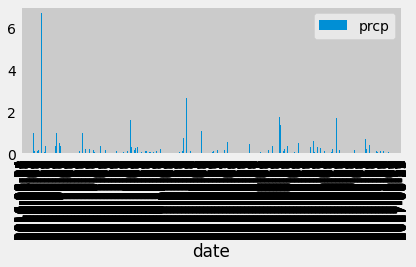

In [213]:
# Use Pandas Plotting with Matplotlib to plot the data
df = last_year_precip_df

df.plot.bar()
plt.tight_layout()
plt.show()

In [216]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_2017df = last_year_precip_df.describe()
stats_2017df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [217]:
# Use Pandas to calcualte the summary statistics for the precipitation data

print(f'Average Rainfall (2017-08 to 2016-08 ){last_year_precip_df.mean()}\n')
print(f'Median Rainfall (2017-08 to 2016-08 ){last_year_precip_df.median()}\n')
print(f'STD Rainfall (2017-08 to 2016-08 ){last_year_precip_df.std()}\n')
print(f'MAX Rainfall (2017-08 to 2016-08 ){last_year_precip_df.max()}\n')
print(f'MIN Rainfall (2017-08 to 2016-08 ){last_year_precip_df.min()}\n')

Average Rainfall (2017-08 to 2016-08 )prcp    0.176462
dtype: float64

Median Rainfall (2017-08 to 2016-08 )prcp    0.02
dtype: float64

STD Rainfall (2017-08 to 2016-08 )prcp    0.460288
dtype: float64

MAX Rainfall (2017-08 to 2016-08 )prcp    6.7
dtype: float64

MIN Rainfall (2017-08 to 2016-08 )prcp    0.0
dtype: float64



# Station Analysis

In [226]:
# Design a query to show how many stations are available in this dataset?
date_count =  session.query(STAT.name).count()
station_names = session.query(STAT.name).all()

print(f' Number of weather stations on Hawii {date_count}\n')
for station in station_names:
    print(f' Station Name and Location: {station}')

 Number of weather stations on Hawii 9

 Station Name and Location: ('WAIKIKI 717.2, HI US',)
 Station Name and Location: ('KANEOHE 838.1, HI US',)
 Station Name and Location: ('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
 Station Name and Location: ('PEARL CITY, HI US',)
 Station Name and Location: ('UPPER WAHIAWA 874.3, HI US',)
 Station Name and Location: ('WAIMANALO EXPERIMENTAL FARM, HI US',)
 Station Name and Location: ('WAIHEE 837.5, HI US',)
 Station Name and Location: ('HONOLULU OBSERVATORY 702.2, HI US',)
 Station Name and Location: ('MANOA LYON ARBO 785.2, HI US',)


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?


In [ ]:
:  # Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
